<H1>AUTOMOBILE - MULTI LINEAR REGRESSION</H1>

In [294]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
columns=['sym','loss','make','fuel','asp','door','body','wheel','location','base','len','wid','ht','c_wt','engine','cyl','engine_size','sys','bore','str','com','hp','rpm','c_mpg','h_mpg','price']
a=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None,names=columns,na_values='?')
a.head()

,sym,loss,make,fuel,asp,door,body,wheel,location,base,...,engine_size,sys,bore,str,com,hp,rpm,c_mpg,h_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [295]:
a.shape

(205, 26)

In [296]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sym          205 non-null    int64  
 1   loss         164 non-null    float64
 2   make         205 non-null    object 
 3   fuel         205 non-null    object 
 4   asp          205 non-null    object 
 5   door         203 non-null    object 
 6   body         205 non-null    object 
 7   wheel        205 non-null    object 
 8   location     205 non-null    object 
 9   base         205 non-null    float64
 10  len          205 non-null    float64
 11  wid          205 non-null    float64
 12  ht           205 non-null    float64
 13  c_wt         205 non-null    int64  
 14  engine       205 non-null    object 
 15  cyl          205 non-null    object 
 16  engine_size  205 non-null    int64  
 17  sys          205 non-null    object 
 18  bore         201 non-null    float64
 19  str     

In [297]:
a.describe()

,sym,loss,base,len,wid,ht,c_wt,engine_size,bore,str,com,hp,rpm,c_mpg,h_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [298]:
a.isnull()

,sym,loss,make,fuel,asp,door,body,wheel,location,base,...,engine_size,sys,bore,str,com,hp,rpm,c_mpg,h_mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [299]:
a.isnull().sum()

sym             0
loss           41
make            0
fuel            0
asp             0
door            2
body            0
wheel           0
location        0
base            0
len             0
wid             0
ht              0
c_wt            0
engine          0
cyl             0
engine_size     0
sys             0
bore            4
str             4
com             0
hp              2
rpm             2
c_mpg           0
h_mpg           0
price           4
dtype: int64

<H1>Symboling</H1>

In [300]:
#Sym-Discrete Data
a.sym.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: sym, dtype: int64

In [301]:
a.sym.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sym', ylabel='count'>

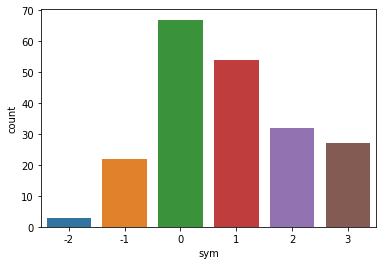

In [302]:
sns.countplot(a.sym)

In [303]:
a.sym.replace([-2,-1,0,1,2,3],['less than zero','less than zero',0,1,2,3],inplace=True)

In [433]:
a.sym.value_counts()

0                 67
1                 54
2                 32
3                 27
less than zero    25
Name: sym, dtype: int64

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sym', ylabel='count'>

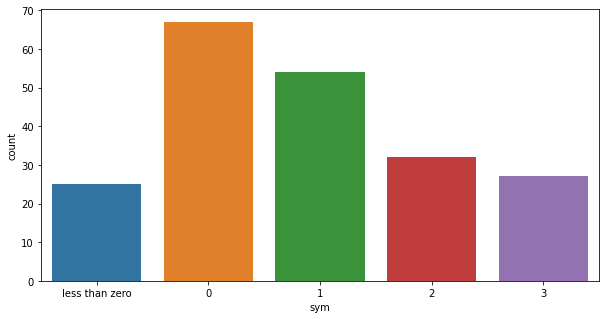

In [304]:
plt.figure(figsize=(10,5))
sns.countplot(a.sym,order=['less than zero',0,1,2,3])

<H1>Normalized Losses</H1>

In [305]:
a.loss.isnull().sum()

41

In [306]:
a.loss.unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [307]:
a.loss.fillna(122.000000,inplace=True)

In [308]:
#Loss-Continuous Data
stats.shapiro(a.loss)

ShapiroResult(statistic=0.9490930438041687, pvalue=1.1780501836256008e-06)

{'whiskers': [<matplotlib.lines.Line2D at 0x226bb4e6130>,
 'caps': [<matplotlib.lines.Line2D at 0x226bb4e6850>,
 'boxes': [<matplotlib.lines.Line2D at 0x226bb4d5d60>],
 'medians': [<matplotlib.lines.Line2D at 0x226bb4e6f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x226bb4f3340>],
 'means': []}

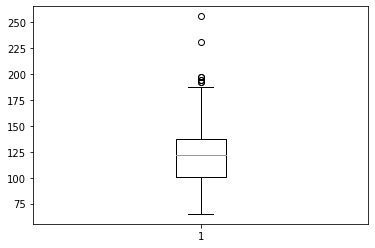

In [309]:
plt.boxplot(a.loss)

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

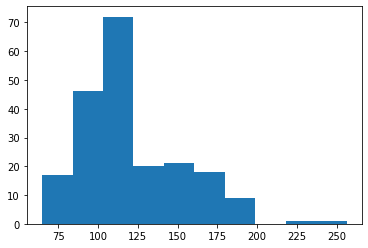

In [310]:
plt.hist(a.loss)

<H1>Make</H1>

In [311]:
#Make-Discrete Data
a.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [312]:
a.make.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='count'>

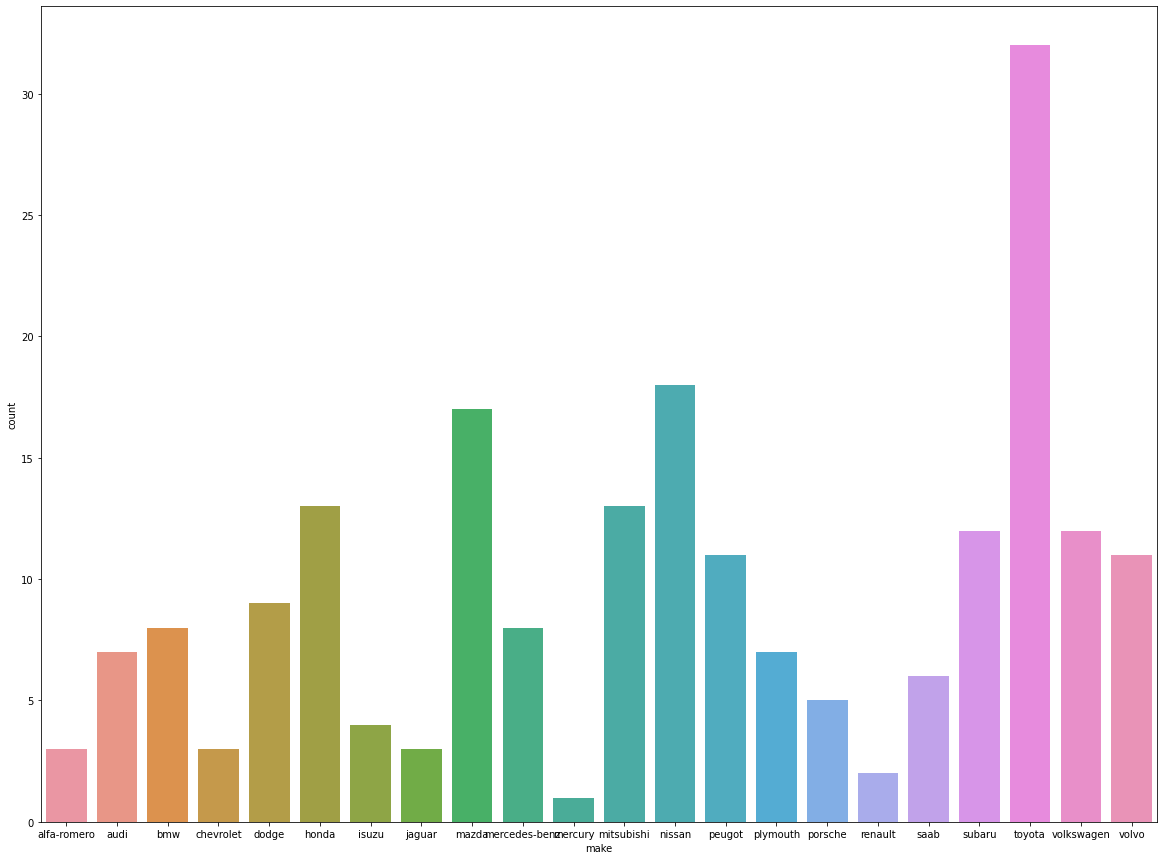

In [313]:
plt.figure(figsize=(20,15))
sns.countplot(a.make)

<H1>Fuel Type</H1>

In [314]:
#Fuel-Discrete Data
a.fuel.value_counts()

gas       185
diesel     20
Name: fuel, dtype: int64

In [315]:
a.fuel.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel', ylabel='count'>

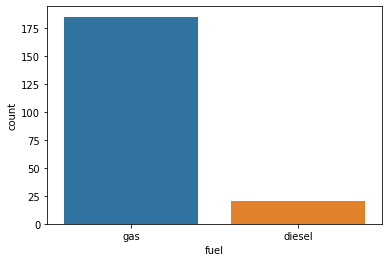

In [316]:
sns.countplot(a.fuel)

<H1>Aspiration</H1>

In [317]:
#Asp-Discrete Data
a.asp.value_counts()

std      168
turbo     37
Name: asp, dtype: int64

In [318]:
a.asp.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='asp', ylabel='count'>

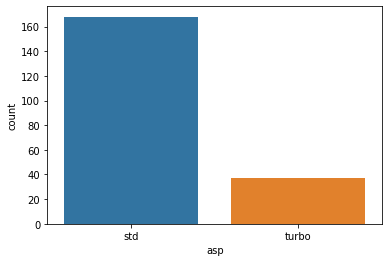

In [319]:
sns.countplot(a.asp)

<H1>Number of Doors</H1>

In [320]:
#Door-Discrete Data
a.door.value_counts()

four    114
two      89
Name: door, dtype: int64

In [321]:
a.door.isnull().sum()

2

In [322]:
b=a.door.mode()
a.door.fillna(b,inplace=True)

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='door', ylabel='count'>

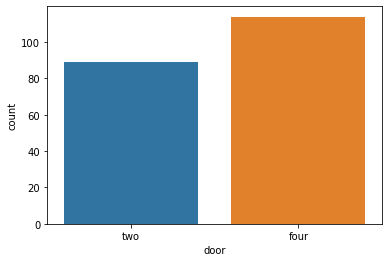

In [323]:
sns.countplot(a.door)

<H1>Body Style</H1>

In [324]:
#Body-Discrete Data
a.body.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body, dtype: int64

In [325]:
a.body.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body', ylabel='count'>

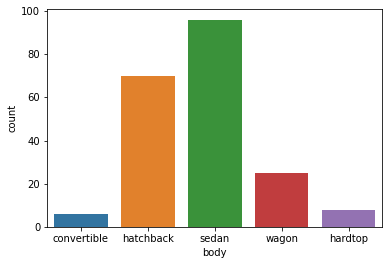

In [326]:
sns.countplot(a.body)

<H1>Drive Wheels</H1>

In [327]:
#Wheel-Discrete Data
a.wheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: wheel, dtype: int64

In [328]:
a.wheel.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wheel', ylabel='count'>

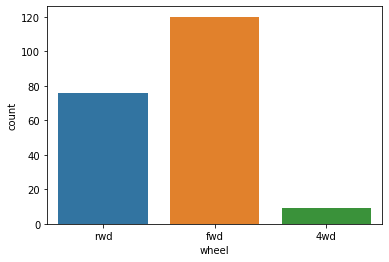

In [329]:
sns.countplot(a.wheel)

<H1>Engine Location</H1>

In [330]:
#Location-Discrete Data
a.location.value_counts()

front    202
rear       3
Name: location, dtype: int64

In [331]:
a.location.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location', ylabel='count'>

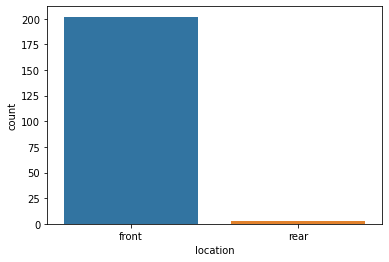

In [332]:
sns.countplot(a.location)

<H1>Wheel Base</H1>

In [333]:
a.base.isnull().sum()

0

In [334]:
#Base-Continuous Data
stats.shapiro(a.base)

ShapiroResult(statistic=0.9115860462188721, pvalue=1.0368441660801864e-09)

{'whiskers': [<matplotlib.lines.Line2D at 0x226bec15df0>,
 'caps': [<matplotlib.lines.Line2D at 0x226bec25550>,
 'boxes': [<matplotlib.lines.Line2D at 0x226bec15a60>],
 'medians': [<matplotlib.lines.Line2D at 0x226bec25c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x226bec2f040>],
 'means': []}

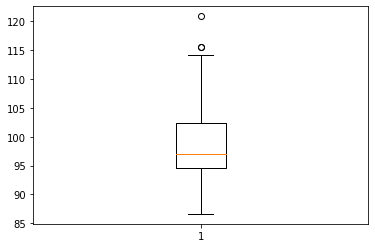

In [335]:
plt.boxplot(a.base)

(array([ 8.,  9., 83., 42., 24., 14., 15.,  3.,  6.,  1.]),
 array([ 86.6 ,  90.03,  93.46,  96.89, 100.32, 103.75, 107.18, 110.61,
        114.04, 117.47, 120.9 ]),
 <BarContainer object of 10 artists>)

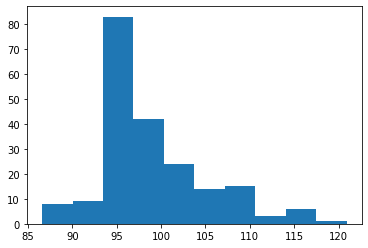

In [336]:
plt.hist(a.base)

<H1>Length</H1>

In [337]:
a.len.isnull().sum()

0

In [338]:
#Len-Continuous Data
stats.shapiro(a.len)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

{'whiskers': [<matplotlib.lines.Line2D at 0x226bed0f070>,
 'caps': [<matplotlib.lines.Line2D at 0x226bed0f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x226bed01ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x226bed0feb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226bed1d280>],
 'means': []}

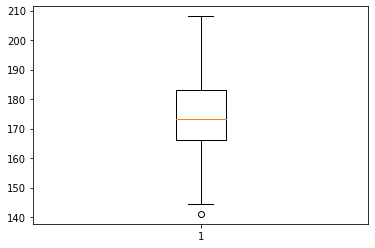

In [339]:
plt.boxplot(a.len)

(array([ 3.,  3., 29., 23., 54., 39., 23., 20.,  8.,  3.]),
 array([141.1, 147.8, 154.5, 161.2, 167.9, 174.6, 181.3, 188. , 194.7,
        201.4, 208.1]),
 <BarContainer object of 10 artists>)

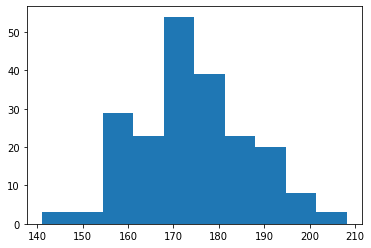

In [340]:
plt.hist(a.len)

<H1>Width</H1>

In [341]:
a.wid.isnull().sum()

0

In [342]:
#Wid-Continuous Data
stats.shapiro(a.wid)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

{'whiskers': [<matplotlib.lines.Line2D at 0x226bedf4130>,
 'caps': [<matplotlib.lines.Line2D at 0x226bedf4850>,
 'boxes': [<matplotlib.lines.Line2D at 0x226bede4d60>],
 'medians': [<matplotlib.lines.Line2D at 0x226bedf4f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x226bedfe340>],
 'means': []}

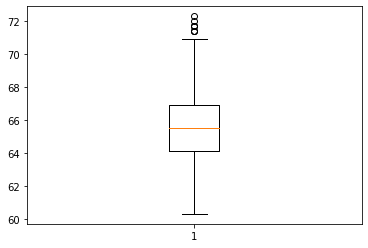

In [343]:
plt.boxplot(a.wid)

(array([ 1.,  2., 36., 39., 44., 42., 20.,  7.,  6.,  8.]),
 array([60.3, 61.5, 62.7, 63.9, 65.1, 66.3, 67.5, 68.7, 69.9, 71.1, 72.3]),
 <BarContainer object of 10 artists>)

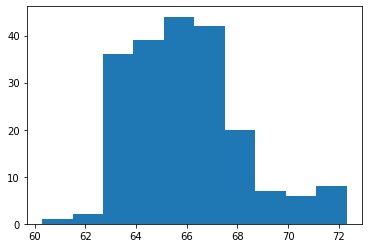

In [344]:
plt.hist(a.wid)

<H1>Height</H1>

In [345]:
a.ht.isnull().sum()

0

In [346]:
#Ht-Continuous Data
stats.shapiro(a.ht)

ShapiroResult(statistic=0.9842321276664734, pvalue=0.021682262420654297)

{'whiskers': [<matplotlib.lines.Line2D at 0x226beea8e20>,
 'caps': [<matplotlib.lines.Line2D at 0x226beeb4580>,
 'boxes': [<matplotlib.lines.Line2D at 0x226beea8a90>],
 'medians': [<matplotlib.lines.Line2D at 0x226beeb4ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226beebe070>],
 'means': []}

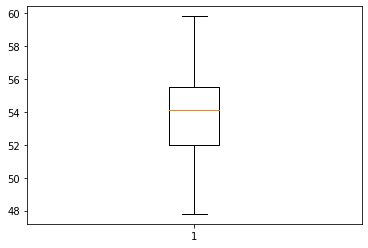

In [347]:
plt.boxplot(a.ht)

(array([ 3.,  9., 28., 25., 33., 41., 38., 15.,  4.,  9.]),
 array([47.8, 49. , 50.2, 51.4, 52.6, 53.8, 55. , 56.2, 57.4, 58.6, 59.8]),
 <BarContainer object of 10 artists>)

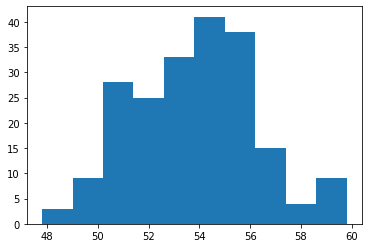

In [348]:
plt.hist(a.ht)

<H1>Curb Weight</H1>

In [349]:
a.c_wt.isnull().sum()

0

In [350]:
#C_wt-Continuous Data
stats.shapiro(a.c_wt)

ShapiroResult(statistic=0.9530424475669861, pvalue=2.8916113024024526e-06)

{'whiskers': [<matplotlib.lines.Line2D at 0x226bef8a4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x226bef8ac10>,
 'boxes': [<matplotlib.lines.Line2D at 0x226bef8a130>],
 'medians': [<matplotlib.lines.Line2D at 0x226bef94370>],
 'fliers': [<matplotlib.lines.Line2D at 0x226bef94700>],
 'means': []}

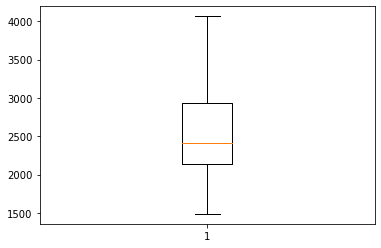

In [351]:
plt.boxplot(a.c_wt)

(array([ 2., 29., 33., 50., 25., 23., 26.,  8.,  5.,  4.]),
 array([1488. , 1745.8, 2003.6, 2261.4, 2519.2, 2777. , 3034.8, 3292.6,
        3550.4, 3808.2, 4066. ]),
 <BarContainer object of 10 artists>)

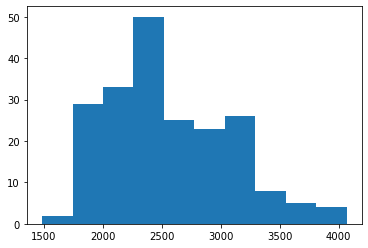

In [352]:
plt.hist(a.c_wt)

<H1>Engine Type</H1>

In [353]:
#Engine-Discrete Data
a.engine.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine, dtype: int64

In [354]:
a.engine.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine', ylabel='count'>

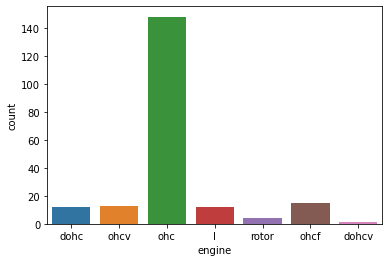

In [355]:
sns.countplot(a.engine)

In [356]:
a.engine.replace(['dohc','ohcv','l','rotor','ohcf','dohcv'],['others','others','others','others','others','others'],inplace=True)

In [434]:
a.engine.value_counts()

ohc       148
others     57
Name: engine, dtype: int64

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine', ylabel='count'>

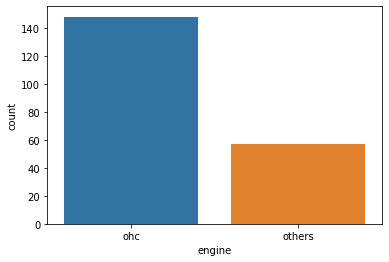

In [357]:
sns.countplot(a.engine,order=['ohc','others'])

<H1>Number of Cylinders</H1>

In [358]:
#Cyl-Discrete Data
a.cyl.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cyl, dtype: int64

In [359]:
a.cyl.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cyl', ylabel='count'>

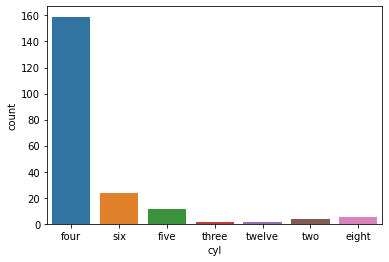

In [360]:
sns.countplot(a.cyl)

In [361]:
a.cyl.replace(['six','five','three','twelve','two','eight'],['others','others','others','others','others','others'],inplace=True)

In [435]:
a.cyl.value_counts()

four      159
others     46
Name: cyl, dtype: int64

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cyl', ylabel='count'>

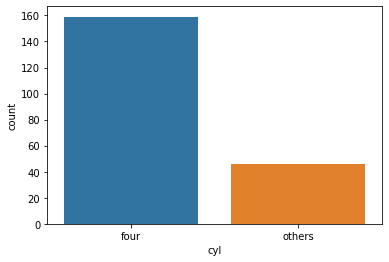

In [362]:
sns.countplot(a.cyl)

<H1>Engine Size</H1>

In [363]:
a.engine_size.isnull().sum()

0

In [364]:
#Engine_Size-Continuous Data
stats.shapiro(a.engine_size)


ShapiroResult(statistic=0.8294388651847839, pvalue=3.0569154792128156e-14)

{'whiskers': [<matplotlib.lines.Line2D at 0x226bf20b790>,
 'caps': [<matplotlib.lines.Line2D at 0x226bf20bd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x226bf20b400>],
 'medians': [<matplotlib.lines.Line2D at 0x226bf213490>],
 'fliers': [<matplotlib.lines.Line2D at 0x226bf213820>],
 'means': []}

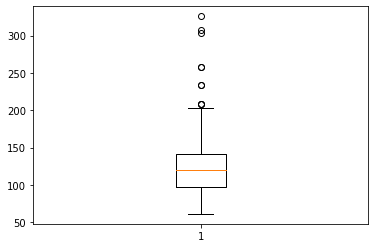

In [365]:
plt.boxplot(a.engine_size)

(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

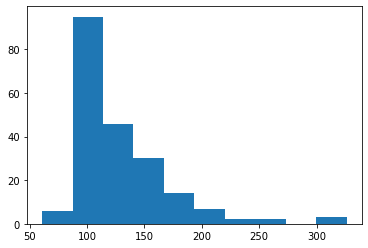

In [366]:
plt.hist(a.engine_size)

<H1>Fuel System</H1>

In [367]:
#Sys-Discrete Data
a.sys.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: sys, dtype: int64

In [368]:
a.sys.isnull().sum()

0

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sys', ylabel='count'>

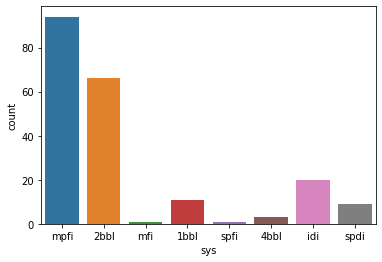

In [369]:
sns.countplot(a.sys)

In [370]:
a.sys.replace(['mfi','1bbl','spfi','4bbl','spdi'],['others','others','others','others','others'],inplace=True)

In [436]:
a.sys.value_counts()

mpfi      94
2bbl      66
others    25
idi       20
Name: sys, dtype: int64

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sys', ylabel='count'>

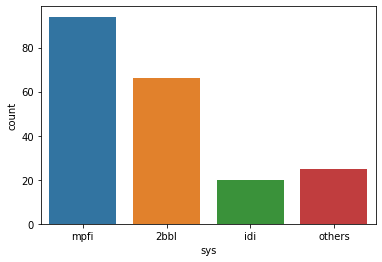

In [371]:
sns.countplot(a.sys,order=['mpfi','2bbl','idi','others'])

<H1>Bore</H1>

In [372]:
a.bore.isnull().sum()

4

In [373]:
a.bore.unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08,  nan, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7 , 3.61, 3.94,
       3.74, 2.54, 3.05, 3.27, 3.24, 3.01])

In [374]:
a.bore.fillna(3.329751,inplace=True)

In [375]:
#Bore-Continuous Data
stats.shapiro(a.bore)

ShapiroResult(statistic=0.967185378074646, pvalue=0.00010421191109344363)

{'whiskers': [<matplotlib.lines.Line2D at 0x226bf3aab20>,
 'caps': [<matplotlib.lines.Line2D at 0x226bf3b7280>,
 'boxes': [<matplotlib.lines.Line2D at 0x226bf3aa790>],
 'medians': [<matplotlib.lines.Line2D at 0x226bf3b79a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226bf3b7d30>],
 'means': []}

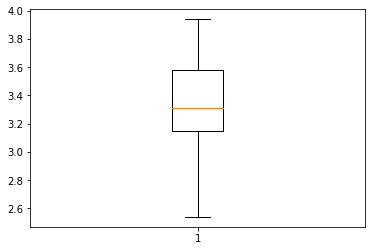

In [376]:
plt.boxplot(a.bore)

(array([ 1.,  1.,  8., 37., 40., 28., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

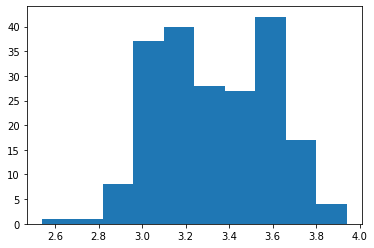

In [377]:
plt.hist(a.bore)

<H1>Stroke</H1>

In [378]:
a.str.isnull().sum()

4

In [379]:
a.str.unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15,  nan, 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64,
       3.08, 3.5 , 3.54, 2.87])

In [380]:
a.str.fillna(3.255423,inplace=True)

In [381]:
#Str.Continuous Data
stats.shapiro(a.str)

ShapiroResult(statistic=0.9377973675727844, pvalue=1.0984009435333064e-07)

{'whiskers': [<matplotlib.lines.Line2D at 0x226c0464dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x226c0474520>,
 'boxes': [<matplotlib.lines.Line2D at 0x226c0464a90>],
 'medians': [<matplotlib.lines.Line2D at 0x226c0474c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x226c0474fd0>],
 'means': []}

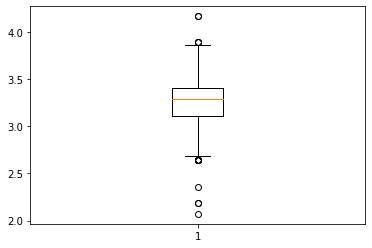

In [382]:
plt.boxplot(a.str)

(array([ 3.,  1., 13.,  7., 30., 56., 71., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

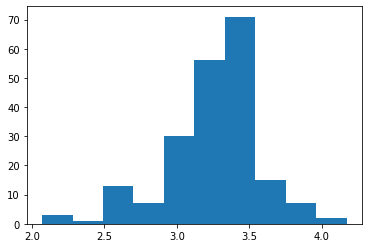

In [383]:
plt.hist(a.str)

<H1>Compression Ratio</H1>

In [384]:
a.com.isnull().sum()

0

In [385]:
#Com-Continuous Data
stats.shapiro(a.com)

ShapiroResult(statistic=0.49774158000946045, pvalue=8.12114079238121e-24)

{'whiskers': [<matplotlib.lines.Line2D at 0x226c0549790>,
 'caps': [<matplotlib.lines.Line2D at 0x226c0549eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x226c0549400>],
 'medians': [<matplotlib.lines.Line2D at 0x226c0554610>],
 'fliers': [<matplotlib.lines.Line2D at 0x226c05549a0>],
 'means': []}

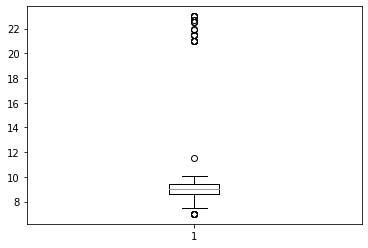

In [386]:
plt.boxplot(a.com)

(array([ 51., 133.,   1.,   0.,   0.,   0.,   0.,   0.,   5.,  15.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <BarContainer object of 10 artists>)

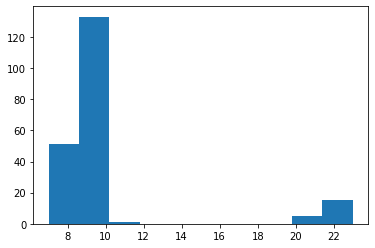

In [387]:
plt.hist(a.com)

<H1>Horse Power</H1>

In [388]:
a.hp.isnull().sum()

2

In [389]:
a.hp.unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        nan,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.])

In [390]:
a.hp.fillna(104.256158,inplace=True)

In [391]:
#Hp-Continuous Data
stats.shapiro(a.hp)

ShapiroResult(statistic=0.8850876688957214, pvalue=2.11449850684442e-11)

{'whiskers': [<matplotlib.lines.Line2D at 0x226c062ce20>,
 'caps': [<matplotlib.lines.Line2D at 0x226c063a580>,
 'boxes': [<matplotlib.lines.Line2D at 0x226c062ca90>],
 'medians': [<matplotlib.lines.Line2D at 0x226c063aca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226c0646070>],
 'means': []}

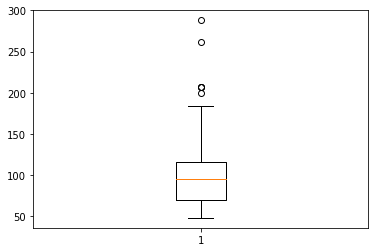

In [392]:
plt.boxplot(a.hp)

(array([55., 49., 51., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

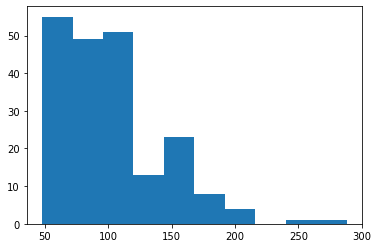

In [393]:
plt.hist(a.hp)

<H1>Peak RPM</H1>

In [394]:
a.rpm.isnull().sum()

2

In [395]:
a.rpm.unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5750.,
         nan, 5250., 4900., 4400., 6600., 5300.])

In [396]:
a.rpm.fillna(5125.369458,inplace=True)

In [397]:
#Rpm-Continuous Data
stats.shapiro(a.rpm)

ShapiroResult(statistic=0.9705138802528381, pvalue=0.000267903262283653)

{'whiskers': [<matplotlib.lines.Line2D at 0x226c0707c70>,
 'caps': [<matplotlib.lines.Line2D at 0x226c07163d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x226c07078e0>],
 'medians': [<matplotlib.lines.Line2D at 0x226c0716b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x226c0716eb0>],
 'means': []}

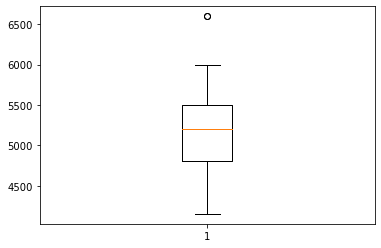

In [398]:
plt.boxplot(a.rpm)

(array([17., 10., 41., 33., 31., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

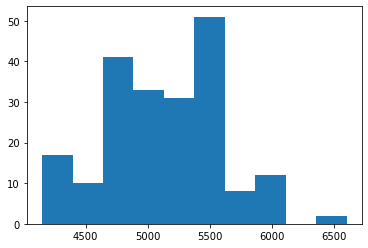

In [399]:
plt.hist(a.rpm)

<H1>City MPG</H1>

In [400]:
a.c_mpg.isnull().sum()

0

In [401]:
#C_mpg-Continuous Data
stats.shapiro(a.c_mpg)

ShapiroResult(statistic=0.9572238922119141, pvalue=7.825866305211093e-06)

{'whiskers': [<matplotlib.lines.Line2D at 0x226c07db9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x226c07e9100>,
 'boxes': [<matplotlib.lines.Line2D at 0x226c07d05b0>],
 'medians': [<matplotlib.lines.Line2D at 0x226c07e9820>],
 'fliers': [<matplotlib.lines.Line2D at 0x226c07e9bb0>],
 'means': []}

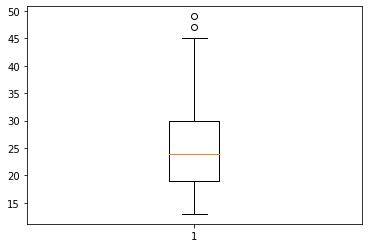

In [402]:
plt.boxplot(a.c_mpg)

(array([12., 46., 24., 56., 18., 31., 15.,  0.,  1.,  2.]),
 array([13. , 16.6, 20.2, 23.8, 27.4, 31. , 34.6, 38.2, 41.8, 45.4, 49. ]),
 <BarContainer object of 10 artists>)

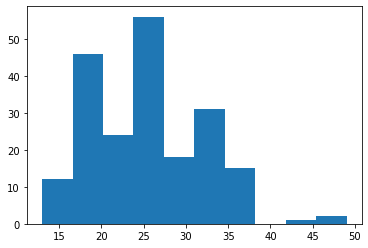

In [403]:
plt.hist(a.c_mpg)

<H1>Highway MPG</H1>

In [404]:
a.h_mpg.isnull().sum()

0

In [405]:
#H_mpg-Continuous Data
stats.shapiro(a.h_mpg)

ShapiroResult(statistic=0.9735103845596313, pvalue=0.0006515368004329503)

{'whiskers': [<matplotlib.lines.Line2D at 0x226c08c3a60>,
 'caps': [<matplotlib.lines.Line2D at 0x226c08d11c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x226c08c36d0>],
 'medians': [<matplotlib.lines.Line2D at 0x226c08d18e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226c08d1c70>],
 'means': []}

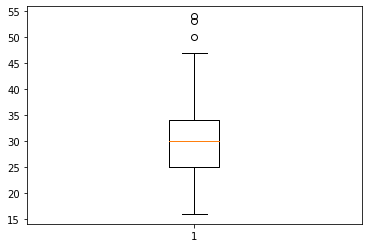

In [406]:
plt.boxplot(a.h_mpg)

(array([ 7., 17., 44., 47., 39., 32.,  8.,  6.,  3.,  2.]),
 array([16. , 19.8, 23.6, 27.4, 31.2, 35. , 38.8, 42.6, 46.4, 50.2, 54. ]),
 <BarContainer object of 10 artists>)

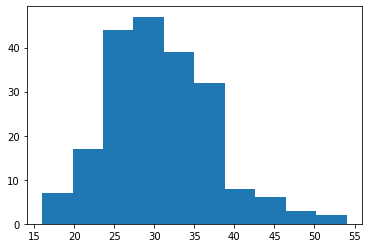

In [407]:
plt.hist(a.h_mpg)

<H1>Price</H1>

In [408]:
a.price.isnull().sum()

4

In [409]:
a.price.unique()

array([13495., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
          nan, 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,
        6529.,  7129.,  7295.,  7895.,  9095.,  8845., 10295., 12945.,
       10345.,  6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,
        6795.,  6695.,  7395., 10945., 11845., 13645., 15645.,  8495.,
       10595., 10245., 10795., 11245., 18280., 18344., 25552., 28248.,
       28176., 31600., 34184., 35056., 40960., 45400., 16503.,  5389.,
        6189.,  6669.,  7689.,  9959.,  8499., 12629., 14869., 14489.,
        6989.,  8189.,  9279.,  5499.,  7099.,  6649.,  6849.,  7349.,
        7299.,  7799.,  7499.,  7999.,  8249.,  8949.,  9549., 13499.,
       14399., 17199., 19699., 18399., 11900., 13200., 12440., 13860.,
       15580., 16900., 16695., 17075., 16630., 17950., 18150., 12764.,
      

In [410]:
a.price.fillna(13207.129353,inplace=True)

In [411]:
#Price-Continuous Data
stats.shapiro(a.price)

ShapiroResult(statistic=0.7997004985809326, pvalue=1.691838515494677e-15)

{'whiskers': [<matplotlib.lines.Line2D at 0x226c09b8130>,
 'caps': [<matplotlib.lines.Line2D at 0x226c09b8850>,
 'boxes': [<matplotlib.lines.Line2D at 0x226c09a7d60>],
 'medians': [<matplotlib.lines.Line2D at 0x226c09b8f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x226c09c3340>],
 'means': []}

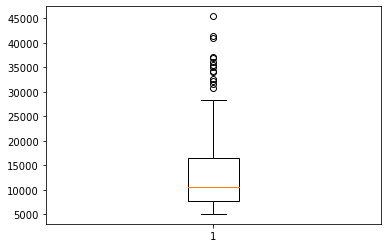

In [412]:
plt.boxplot(a.price)

(array([81., 45., 39., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

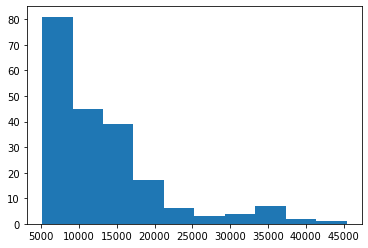

In [413]:
plt.hist(a.price)

<H1>STRENGTH TEST</H1>

In [416]:
strength=stats.pearsonr(a.loss,a.price)
print(strength)
#Weak Positive

(0.13399873429274337, 0.05543057826318259)


In [417]:
strength=stats.pearsonr(a.base,a.price)
print(strength)
#Weak Positive

(0.5831681499791512, 4.5276255455256544e-20)


In [418]:
strength=stats.pearsonr(a.len,a.price)
print(strength)
#Moderate Positive

(0.6829862954389819, 1.649887328966592e-29)


In [419]:
strength=stats.pearsonr(a.wid,a.price)
print(strength)
#Moderate Positive

(0.7286988175929279, 3.214520484065366e-35)


In [420]:
strength=stats.pearsonr(a.ht,a.price)
print(strength)
#Weak Positive

(0.13438751871101878, 0.05471982048333642)


In [421]:
strength=stats.pearsonr(a.c_wt,a.price)
print(strength)
#Moderate Positive

(0.8208247333547347, 2.8663321070187436e-51)


In [425]:
strength=stats.pearsonr(a.engine_size,a.price)
print(strength)
#Moderate Positive

(0.8617522436859498, 9.669661923782083e-62)


In [426]:
strength=stats.pearsonr(a.bore,a.price)
print(strength)
#Weak Positive

(0.5323000199585453, 2.1398305142063517e-16)


In [427]:
strength=stats.pearsonr(a.str,a.price)
print(strength)
#Weak Positive

(0.08209529537133145, 0.24191456955577154)


In [428]:
strength=stats.pearsonr(a.com,a.price)
print(strength)
#Weak Positive

(0.0709903627791758, 0.31178249194796)


In [429]:
strength=stats.pearsonr(a.hp,a.price)
print(strength)
#Moderate Positive

(0.7579169537076744, 1.6076704223961165e-39)


In [430]:
strength=stats.pearsonr(a.rpm,a.price)
print(strength)
#Weak Negative

(-0.10085406591095528, 0.15019246954531384)


In [431]:
strength=stats.pearsonr(a.c_mpg,a.price)
print(strength)
#Weak Negative

(-0.6674492651601812, 8.463700497351642e-28)


In [432]:
strength=stats.pearsonr(a.h_mpg,a.price)
print(strength)
#Weak Negative

(-0.6905257341186237, 2.2324674056721096e-30)


<H1>HYPOTHESIS TEST</H1>

<H1>Price vs Symboling</H1>

In [437]:
sym1=a.price[a.sym=='less than zero']
sym2=a.price[a.sym==0]
sym3=a.price[a.sym==1]
sym4=a.price[a.sym==2]
sym5=a.price[a.sym==3]
stats.f_oneway(sym1,sym2,sym3,sym4,sym5)

F_onewayResult(statistic=8.596939059375929, pvalue=2.0165673442839212e-06)

<H1>Price vs Make</H1>

In [199]:
make1=a.price[a.make=="toyota"]
make2=a.price[a.make=="nissan"]
make3=a.price[a.make=="mazda"]
make4=a.price[a.make=="mitsubishi"]
make5=a.price[a.make=="honda"]
make6=a.price[a.make=="volkswagen"]
make7=a.price[a.make=="subaru"]
make8=a.price[a.make=="peugot"]
make9=a.price[a.make=="volvo"]
make10=a.price[a.make=="dodge"]
make11=a.price[a.make=="mercedes-benz"]
make12=a.price[a.make=="bmw"]
make13=a.price[a.make=="audi"]
make14=a.price[a.make=="plymouth"]
make15=a.price[a.make=="saab"]
make16=a.price[a.make=="porsche"]
make17=a.price[a.make=="isuzu"]
make18=a.price[a.make=="jaguar"]
make19=a.price[a.make=="chevrolet"]
make20=a.price[a.make=="alfa-romero"]
make21=a.price[a.make=="renault"]
make22=a.price[a.make=="mercury"]
stats.f_oneway(make1,make2,make3,make4,make5,make6,make7,make8,make9,make10,make11,make12,make13,make14,make15,make16,make17,make18,make19,make20,make21,make22)

F_onewayResult(statistic=29.502215510941898, pvalue=1.019817853452345e-47)

<H1>Price vs Fuel Type</H1>

In [438]:
fuel1=a.price[a.fuel=='diesel']
fuel2=a.price[a.fuel=='gas']
stats.f_oneway(fuel1,fuel2)

F_onewayResult(statistic=2.4958589760769563, pvalue=0.11570297526298147)

<H1>Price vs Aspiration</H1>

In [439]:
asp1=a.price[a.asp=="std"]
asp2=a.price[a.asp=="turbo"]
stats.f_oneway(asp1,asp2)

F_onewayResult(statistic=6.587289855132936, pvalue=0.010991046478680874)

<H1>Price vs Number of Doors</H1>

In [440]:
door1=a.price[a.door=="two"]
door2=a.price[a.door=="four"]
stats.f_oneway(door1,door2)

F_onewayResult(statistic=0.42717100936888064, pvalue=0.5141273489168228)

<H1>Price vs Body Styles</H1>

In [441]:
body1=a.price[a.body=="convertible"]
body2=a.price[a.body=="hatchback"]
body3=a.price[a.body=="sedan"]
body4=a.price[a.body=="wagon"]
body5=a.price[a.body=="hardtop"]
stats.f_oneway(body1,body2,body3,body4,body5)

F_onewayResult(statistic=9.183927252583393, pvalue=7.844575720804091e-07)

<H1>Price vs Drive Wheels</H1>

In [201]:
wheel1=a.price[a.wheel=="fwd"]
wheel2=a.price[a.wheel=="rwd"]
wheel3=a.price[a.wheel=="4wd"]
stats.f_oneway(wheel1,wheel2,wheel3)

F_onewayResult(statistic=67.50366682673254, pvalue=3.53927079151706e-23)

<H1>Price vs Engine Location</H1>

In [442]:
location1=a.price[a.location=="front"]
location2=a.price[a.location=="rear"]
stats.f_oneway(location1,location2)

F_onewayResult(statistic=24.979629190458926, pvalue=1.2486063656753427e-06)

<H1>Price vs Engine Type</H1>

In [443]:
engine1=a.price[a.engine=="ohc"]
engine2=a.price[a.engine=="others"]
stats.f_oneway(engine1,engine2)

F_onewayResult(statistic=24.772969427215386, pvalue=1.3736873269914974e-06)

<H1>Price vs Num-of-Cylinders</H1>

In [444]:
cyl1=a.price[a.cyl=="four"]
cyl2=a.price[a.cyl=="others"]
stats.f_oneway(cyl1,cyl2)

F_onewayResult(statistic=173.79146873895385, pvalue=4.4652216110329754e-29)

<H1>Price vs Fuel Systems</H1>

In [447]:
sys1=a.price[a.cyl=="mpfi"]
sys2=a.price[a.cyl=="2bbl"]
sys3=a.price[a.cyl=="others"]
sys4=a.price[a.cyl=="idi"]
stats.f_oneway(sys1,sys2,sys3,sys4)

F_onewayResult(statistic=nan, pvalue=nan)

<H1>CREATING MODEL</H1>

In [205]:
a.drop(['sym','make','fuel','asp','door','body','wheel','location','engine','cyl','sys'],axis=1,inplace=True)

In [206]:
y=a.price
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [207]:
train_y=y.iloc[0:164]
print(train_y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
159     7788.0
160     7738.0
161     8358.0
162     9258.0
163     8058.0
Name: price, Length: 164, dtype: float64


In [208]:
test_y=y.iloc[164:]
print(test_y)

164     8238.0
165     9298.0
166     9538.0
167     8449.0
168     9639.0
169     9989.0
170    11199.0
171    11549.0
172    17669.0
173     8948.0
174    10698.0
175     9988.0
176    10898.0
177    11248.0
178    16558.0
179    15998.0
180    15690.0
181    15750.0
182     7775.0
183     7975.0
184     7995.0
185     8195.0
186     8495.0
187     9495.0
188     9995.0
189    11595.0
190     9980.0
191    13295.0
192    13845.0
193    12290.0
194    12940.0
195    13415.0
196    15985.0
197    16515.0
198    18420.0
199    18950.0
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, dtype: float64


In [209]:
x=a.drop('price',axis=1)
print(x)

      loss   base    len   wid    ht  c_wt  engine_size  bore   str   com  \
0    122.0   88.6  168.8  64.1  48.8  2548          130  3.47  2.68   9.0   
1    122.0   88.6  168.8  64.1  48.8  2548          130  3.47  2.68   9.0   
2    122.0   94.5  171.2  65.5  52.4  2823          152  2.68  3.47   9.0   
3    164.0   99.8  176.6  66.2  54.3  2337          109  3.19  3.40  10.0   
4    164.0   99.4  176.6  66.4  54.3  2824          136  3.19  3.40   8.0   
..     ...    ...    ...   ...   ...   ...          ...   ...   ...   ...   
200   95.0  109.1  188.8  68.9  55.5  2952          141  3.78  3.15   9.5   
201   95.0  109.1  188.8  68.8  55.5  3049          141  3.78  3.15   8.7   
202   95.0  109.1  188.8  68.9  55.5  3012          173  3.58  2.87   8.8   
203   95.0  109.1  188.8  68.9  55.5  3217          145  3.01  3.40  23.0   
204   95.0  109.1  188.8  68.9  55.5  3062          141  3.78  3.15   9.5   

        hp     rpm  c_mpg  h_mpg  
0    111.0  5000.0     21     27  
1    

In [210]:
x=sm.add_constant(x)

C:\Users\SANJAY\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [211]:
train_x=x.iloc[0:164]
print(train_x)

     const   loss  base    len   wid    ht  c_wt  engine_size  bore   str  \
0      1.0  122.0  88.6  168.8  64.1  48.8  2548          130  3.47  2.68   
1      1.0  122.0  88.6  168.8  64.1  48.8  2548          130  3.47  2.68   
2      1.0  122.0  94.5  171.2  65.5  52.4  2823          152  2.68  3.47   
3      1.0  164.0  99.8  176.6  66.2  54.3  2337          109  3.19  3.40   
4      1.0  164.0  99.4  176.6  66.4  54.3  2824          136  3.19  3.40   
..     ...    ...   ...    ...   ...   ...   ...          ...   ...   ...   
159    1.0   91.0  95.7  166.3  64.4  52.8  2275          110  3.27  3.35   
160    1.0   91.0  95.7  166.3  64.4  53.0  2094           98  3.19  3.03   
161    1.0   91.0  95.7  166.3  64.4  52.8  2122           98  3.19  3.03   
162    1.0   91.0  95.7  166.3  64.4  52.8  2140           98  3.19  3.03   
163    1.0  168.0  94.5  168.7  64.0  52.6  2169           98  3.19  3.03   

      com     hp     rpm  c_mpg  h_mpg  
0     9.0  111.0  5000.0     21   

In [212]:
test_x=x.iloc[164:]
print(test_x)

     const   loss   base    len   wid    ht  c_wt  engine_size  bore   str  \
164    1.0  168.0   94.5  168.7  64.0  52.6  2204           98  3.19  3.03   
165    1.0  168.0   94.5  168.7  64.0  52.6  2265           98  3.24  3.08   
166    1.0  168.0   94.5  168.7  64.0  52.6  2300           98  3.24  3.08   
167    1.0  134.0   98.4  176.2  65.6  52.0  2540          146  3.62  3.50   
168    1.0  134.0   98.4  176.2  65.6  52.0  2536          146  3.62  3.50   
169    1.0  134.0   98.4  176.2  65.6  52.0  2551          146  3.62  3.50   
170    1.0  134.0   98.4  176.2  65.6  52.0  2679          146  3.62  3.50   
171    1.0  134.0   98.4  176.2  65.6  52.0  2714          146  3.62  3.50   
172    1.0  134.0   98.4  176.2  65.6  53.0  2975          146  3.62  3.50   
173    1.0   65.0  102.4  175.6  66.5  54.9  2326          122  3.31  3.54   
174    1.0   65.0  102.4  175.6  66.5  54.9  2480          110  3.27  3.35   
175    1.0   65.0  102.4  175.6  66.5  53.9  2414          122  

In [213]:
model=sm.OLS(train_y,train_x).fit()

In [214]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     52.35
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           3.08e-50
Time:                        19:15:53   Log-Likelihood:                -1571.0
No. Observations:                 164   AIC:                             3172.
Df Residuals:                     149   BIC:                             3219.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.897e+04   1.97e+04     -1.469      0.144   -6.79e+04    9986.655
loss           12.7899     11.631      1.100      0.273     -10.192      35.772
base          102.7027    126.877      0.809      0.420    -148.007     353.413
len            10.9567     68.659      0.160      0.873    -124.715     146.629
wid          -128.2053    304.887     -0.421      0.675    -730.666     474.256
ht            114.3741    180.783      0.633      0.528    -242.855     471.603
c_wt            1.2682      2.227      0.569      0.570      -3.133       5.670
engine_size   149.1595     17.850      8.356      0.000     113.887     184.432
bore         -140.5373   1678.295     -0.084      0.933   -3456.871    3175.797
str         -2984.1596    949.403     -3.143      0.002   -4860.193   -1108.126
com           311.3376    115.688      2.691      0.008      82.736     539.939
hp             -3.8834     22.831     -0.170      0.865     -48.997      41.230
rpm             3.9520      1.033      3.825      0.000       1.911       5.994
c_mpg         -31.1696    235.918     -0.132      0.895    -497.347     435.008
h_mpg        -100.8571    211.693     -0.476      0.634    -519.166     317.452
==============================================================================
Omnibus:                       16.867   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.128
Skew:                           0.007   Prob(JB):                     1.96e-14
Kurtosis:                       6.039   Cond. No.                     3.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
model.params

const         -28971.194401
loss              12.789934
base             102.702747
len               10.956701
wid             -128.205291
ht               114.374148
c_wt               1.268229
engine_size      149.159539
bore            -140.537341
str            -2984.159618
com              311.337583
hp                -3.883446
rpm                3.952015
c_mpg            -31.169633
h_mpg           -100.857051
dtype: float64